## EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data_path = "/content/drive/MyDrive/CSE_712_Project/dataset/olid-training-v1.0.tsv"
selected_columns = ['tweet', 'subtask_a','subtask_b']
data = pd.read_csv(data_path, sep='\t')
data[selected_columns][:5]

,tweet,subtask_a,subtask_b
0,@USER She should ask a few native Americans wh...,OFF,UNT
1,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN
2,Amazon is investigating Chinese employees who ...,NOT,NaN
3,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT
4,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN


In [ ]:
data.shape

(13240, 5)

In [ ]:
subtask_a = data['subtask_a'].value_counts()
subtask_a

NOT    8840
OFF    4400
Name: subtask_a, dtype: int64

In [ ]:
subtask_b = data['subtask_b'].value_counts()
subtask_b

TIN    3876
UNT     524
Name: subtask_b, dtype: int64

In [ ]:
data[data['subtask_a'] == 'NOT'].head(10)
data[data['subtask_b'] == 'NOT'].head(10)

,id,tweet,subtask_a,subtask_b,subtask_c


In [ ]:
#Exploring the olid data
data["tweet"][3]

'@USER Someone should\'veTaken" this piece of shit to a volcano. 😂"'

## Class distribution

Text(0.5, 0.98, 'Class distribution')

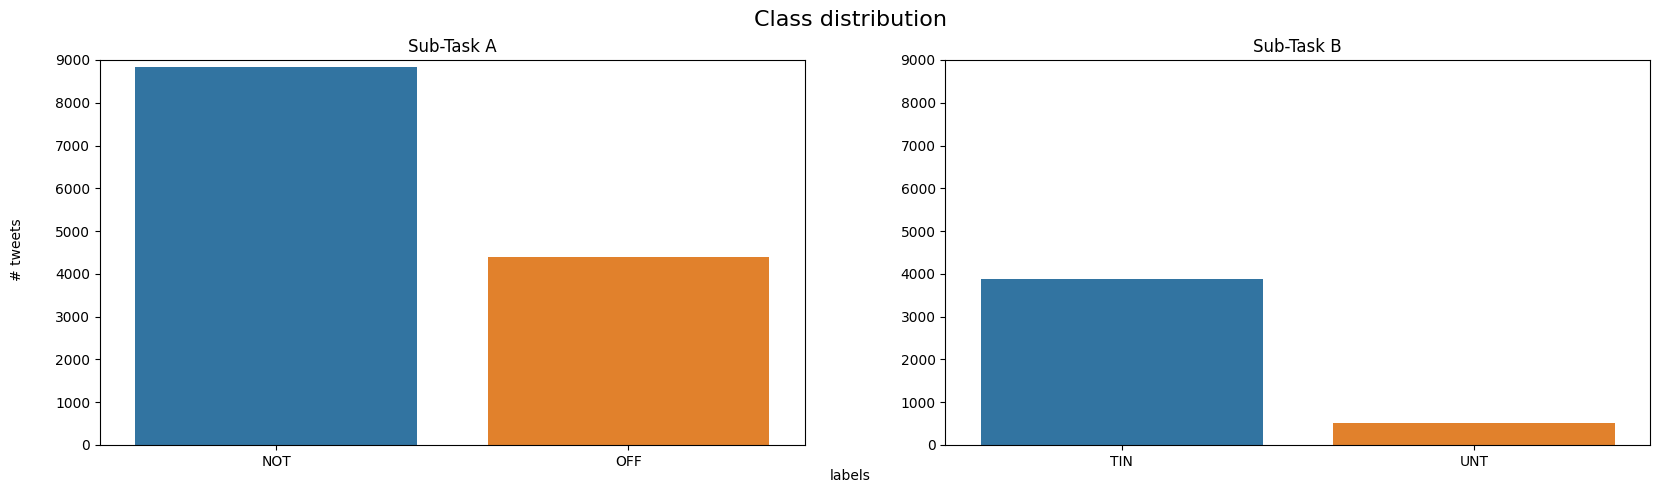

In [ ]:
import seaborn as sns
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,5))
x=data.subtask_a.value_counts()
sns.barplot(x=x.index, y=x.values, ax=ax1)
ax1.set_title('Sub-Task A')
ax1.set_ylim([0,9000])

x=data.subtask_b.value_counts()
sns.barplot(x=x.index, y=x.values, ax=ax2)
ax2.set_title('Sub-Task B')
ax2.set_ylim([0,9000])



fig.text(0.5, 0.04, 'labels', ha='center')
fig.text(0.08, 0.5, '# tweets', va='center',  rotation='vertical')
fig.suptitle('Class distribution', fontsize=16)


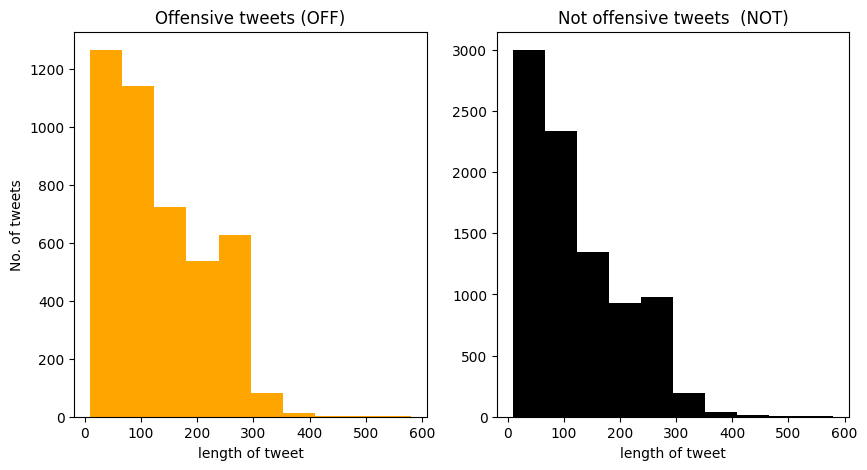

In [ ]:
#Number of characters in tweets
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=data[data['subtask_a']=='OFF']['tweet'].str.len()
ax1.hist(tweet_len,color='orange')
ax1.set_ylabel('No. of tweets')
ax1.set_xlabel('length of tweet')
ax1.set_title('Offensive tweets (OFF)')
# ax1.set_ylim([0,3500])

tweet_len=data[data['subtask_a']=='NOT']['tweet'].str.len()
ax2.hist(tweet_len,color='black')
ax2.set_title('Not offensive tweets  (NOT)')
ax2.set_xlabel('length of tweet')

plt.show()

In [ ]:
subtask_a = data['subtask_a'].value_counts().reset_index()
subtask_a

,index,subtask_a
0,NOT,8840
1,OFF,4400


In [ ]:
subtask_b = data['subtask_b'].value_counts().reset_index()
subtask_b

,index,subtask_b
0,TIN,3876
1,UNT,524


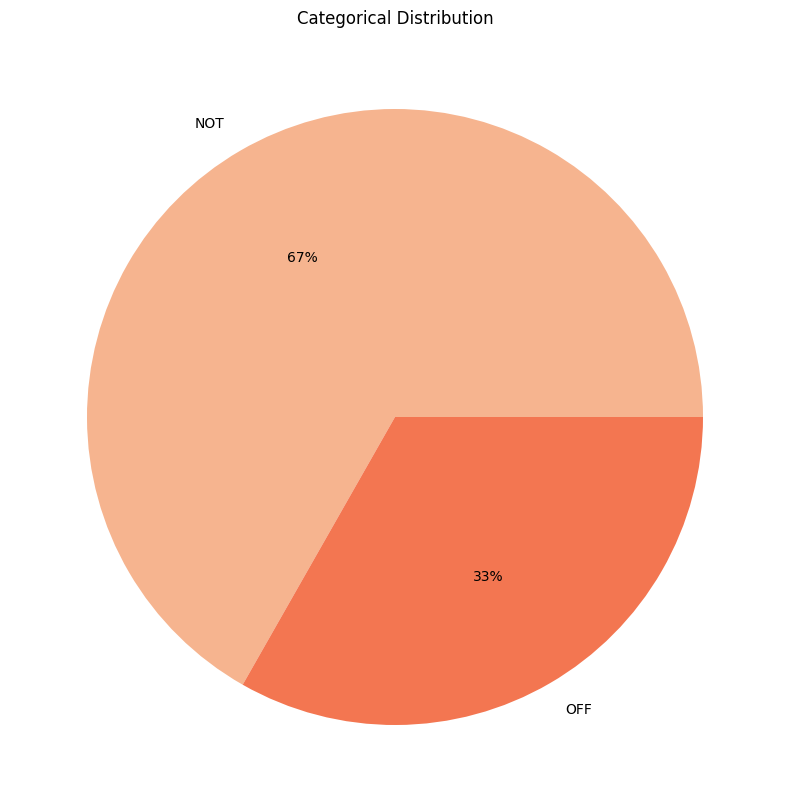

In [ ]:
#Plotting a pie chart to show the category distribution
plt.figure(figsize=(15,10))
plt.pie(subtask_a["subtask_a"], labels=subtask_a["index"],
        colors=sns.color_palette("rocket_r"),autopct='%.0f%%')
plt.title("Categorical Distribution")
plt.show()

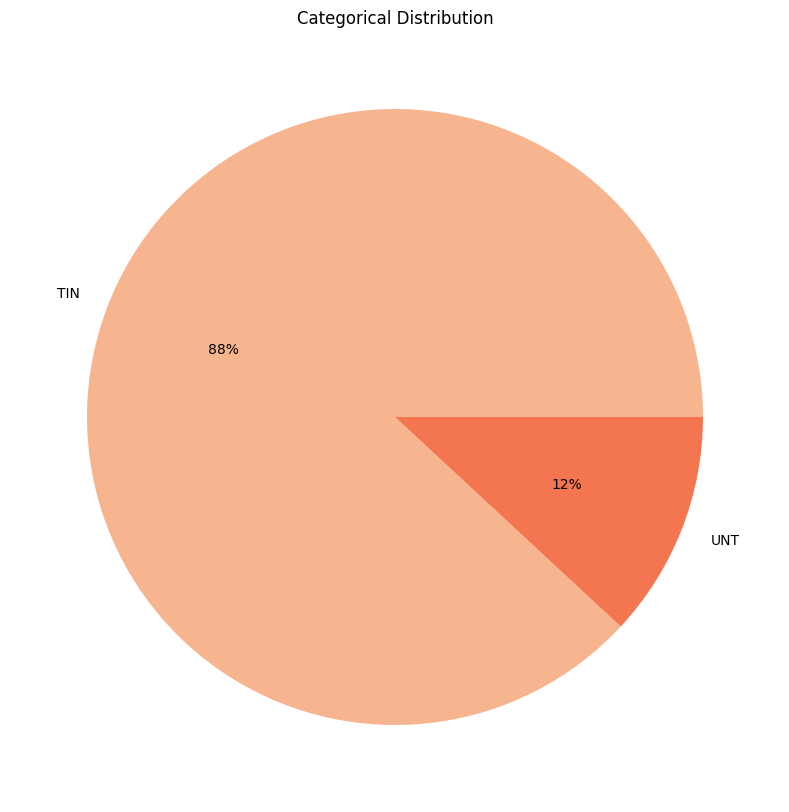

In [ ]:
#Plotting a pie chart to show the category distribution
plt.figure(figsize=(15,10))
plt.pie(subtask_b["subtask_b"], labels=subtask_b["index"],
        colors=sns.color_palette("rocket_r"),autopct='%.0f%%')
plt.title("Categorical Distribution")
plt.show()

## Common Stop words

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from collections import defaultdict
from collections import Counter


def create_corpus(df, label, text,target):
    corpus=[]

    for x in df[df[label]==target][text].str.split():
        for i in x:
            corpus.append(i.lower())
    return corpus

def plot_top_stop(corpus, ax):
    stop=set(stopwords.words('english'))
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1

    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    sns.barplot(x=list(x),y=list(y), ax = ax)

def plot_top_punct(corpus, ax):
    dic=defaultdict(int)
    special = string.punctuation
    for i in (corpus):
        if i in special:
            dic[i]+=1

    x,y=zip(*dic.items())
    sns.barplot(x=list(x),y=list(y), ax = ax)

def plot_common_words(corpus, ax, n = 10):
    counter=Counter(corpus)
    stop= stopwords.words('english')
    stop.append('@user')
    stop=set(stop)
    most=counter.most_common()
    x=[]
    y=[]
    for word,count in most[:n]:
        if (word not in stop) :
            x.append(word)
            y.append(count)
    sns.barplot(x=y,y=x, ax=ax)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Text(0.5, 0.98, 'Common stop words')

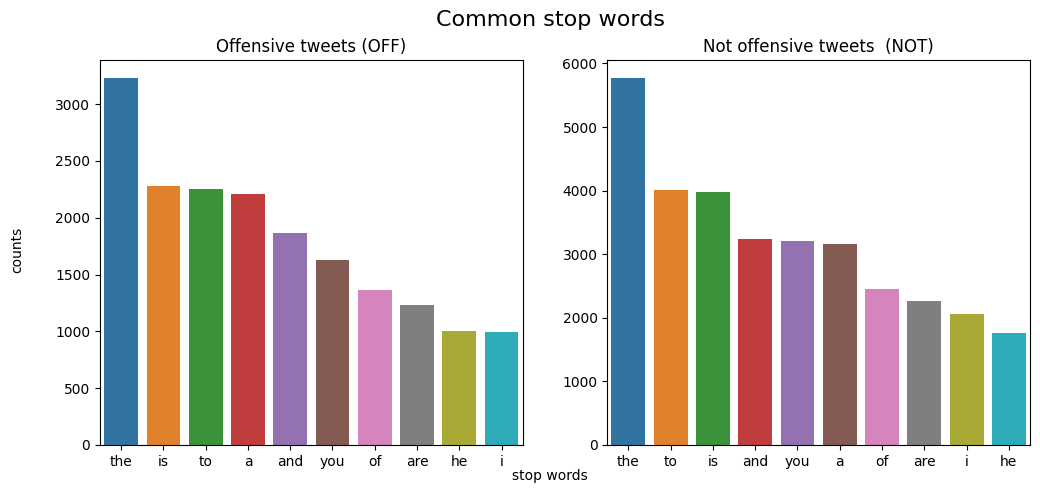

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))


corpus=create_corpus(data, 'subtask_a', 'tweet', 'OFF')
plot_top_stop(corpus, ax1)
ax1.set_title('Offensive tweets (OFF)')
corpus=create_corpus(data, 'subtask_a', 'tweet', 'NOT')
plot_top_stop(corpus,ax=ax2)
ax2.set_title('Not offensive tweets  (NOT)')

fig.text(0.5, 0.04, 'stop words', ha='center')
fig.text(0.05, 0.5, 'counts', va='center',  rotation='vertical')
fig.suptitle('Common stop words', fontsize=16)

## Common punctuations

Text(0.5, 0.98, 'Common punctuations')

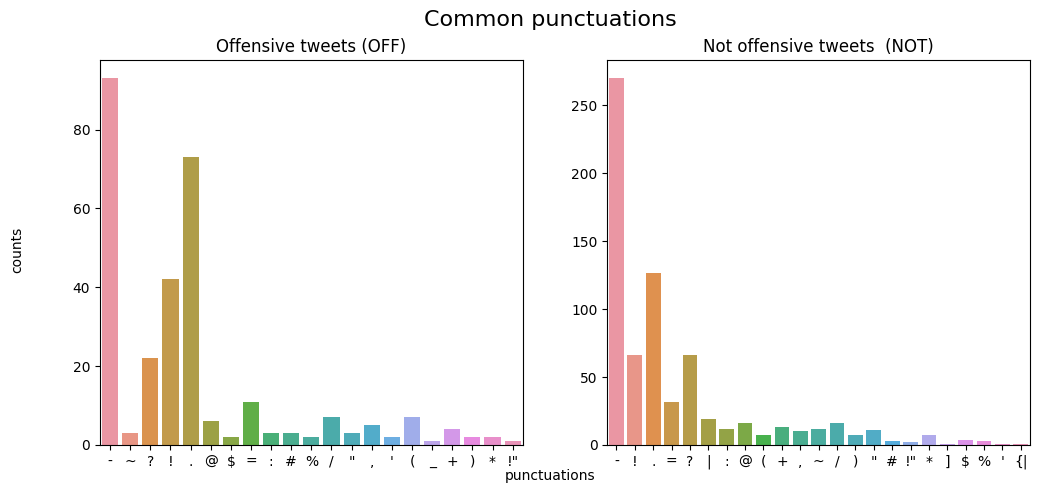

In [ ]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,5))


corpus=create_corpus(data, 'subtask_a', 'tweet', 'OFF')
plot_top_punct(corpus, ax=ax1)
ax1.set_title('Offensive tweets (OFF)')

corpus=create_corpus(data, 'subtask_a', 'tweet', 'NOT')
plot_top_punct(corpus, ax=ax2)
ax2.set_title('Not offensive tweets  (NOT)')


fig.text(0.5, 0.04, 'punctuations', ha='center')
fig.text(0.05, 0.5, 'counts', va='center',  rotation='vertical')
fig.suptitle('Common punctuations', fontsize=16)


## Common words

Text(0.5, 0.98, 'Common Words')

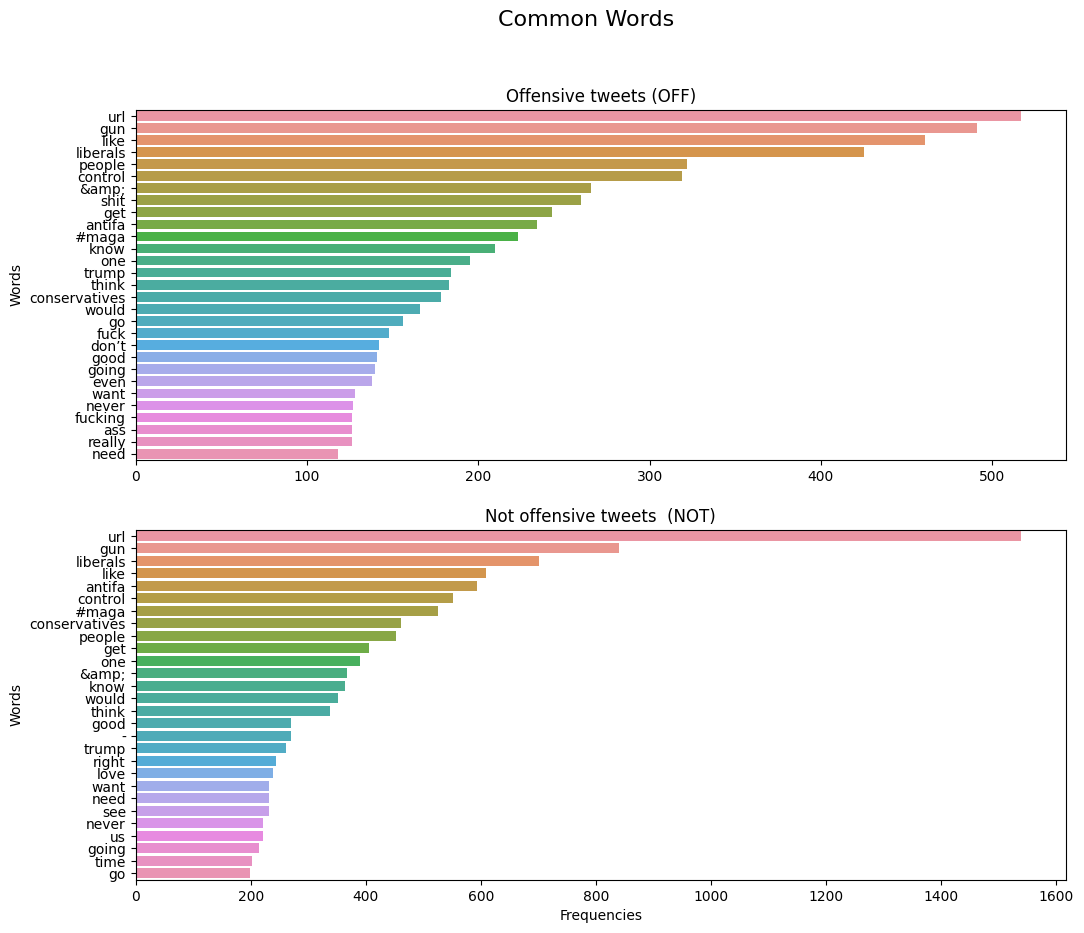

In [ ]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(12,10))

corpus=create_corpus(data, 'subtask_a', 'tweet', 'OFF')
plot_common_words(corpus, ax1, 100)
ax1.set_title('Offensive tweets (OFF)')
# ax1.set_xlabel('# words in a tweet')
ax1.set_ylabel('Words')

corpus=create_corpus(data, 'subtask_a', 'tweet', 'NOT')
plot_common_words(corpus, ax2, 100)
ax2.set_title('Not offensive tweets  (NOT)')
ax2.set_xlabel('Frequencies')
ax2.set_ylabel('Words')

fig.suptitle('Common Words', fontsize=16)

## Data Cleaning
1. Data Cleaning
2. Data encoding

## Data Cleaning

In [ ]:
!pip install spellcheck

In [ ]:
from multiprocessing import  Pool

In [ ]:
!pip install pyspellchecker


In [ ]:
import re
import spellchecker
from spellchecker import SpellChecker

In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

### Hashtags
def remove_hashtag(text):
    hashtag=re.compile(r'#\w+')
    return hashtag.sub(r'',text)

### Punctuations
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

### Mentions
def remove_mentions(text):
    mention=re.compile(r'@\w+')
    return mention.sub(r'',text)

### URL
def remove_URL(text):
    URL=re.compile(r'URL|&amp')
    return URL.sub(r'',text)

### Spell Checker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

def clean_tweets(df):

    df['tweet_cleaned'] = df['tweet'].str.lower().apply(lambda x: remove_emoji(x))\
                                    .apply(lambda x: remove_hashtag(x))\
                                    .apply(lambda x: remove_mentions(x))\
                                    .apply(lambda x: remove_URL(x))\
                                    .apply(lambda x: remove_punct(x))\
                                    .str.strip()
    #                                     .apply(lambda x: correct_spellings(x))\


    return df

def parallelize_cleaning(df, func, n_cores=10):
    df_split = np.array_split(df, n_cores)
    pool = Pool(n_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

In [ ]:
cleaned_data = parallelize_cleaning(data, clean_tweets)

In [ ]:
%%time
cleaned_data.to_csv('/content/drive/MyDrive/CSE_712_Project/data.csv', index=False)

CPU times: user 175 ms, sys: 3.85 ms, total: 178 ms
Wall time: 380 ms


In [ ]:
!pip install twitter

In [ ]:
import twitter

In [ ]:
#Importing the necesasry libraries
# from twitter import TwitterAccess
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.metrics import classification_report, roc_auc_score, f1_score
from sklearn.base import BaseEstimator, ClassifierMixin # ???
from sklearn.utils.validation import check_X_y, check_is_fitted # ???
from scipy import sparse #???
from sklearn.linear_model import LogisticRegression


from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Input, Conv1D, GlobalMaxPooling1D, Concatenate, Dropout, Add
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
from keras.utils import np_utils
from tqdm import tqdm

In [ ]:
#Utils
def create_corpus(tweets):
    stop=set(stopwords.words('english'))
    corpus=[]
    for tweet in tqdm(tweets):
#         words=[word.lower() for word in nltk.casual_tokenize(tweet) if((word.isalpha()==1) & (word not in stop))]
        words=[word.lower() for word in nltk.casual_tokenize(tweet)]
        corpus.append(words)
    return corpus


def get_embedding_matrix(word_index, num_words, embedding_dim):
    embedding_dict={}
# with open('./data/glove6B/glove.6B.100d.txt','r') as f:
    with open('/content/drive/MyDrive/CSE_712_Project/dataset/glove.twitter.27B.100d.txt','r') as f:
        for line in f:
            values=line.split()
            word=values[0]
            vectors=np.asarray(values[1:],'float32')
            embedding_dict[word]=vectors
    f.close()

    embedding_matrix=np.zeros((num_words,embedding_dim))

    for word,i in tqdm(word_index.items()):
        if i > num_words:
            continue

        emb_vec=embedding_dict.get(word)
        if emb_vec is not None:
            embedding_matrix[i]=emb_vec
    return embedding_matrix

In [ ]:
from keras.utils import pad_sequences

In [ ]:
#Architecture
def architecture(text, nclasses, lr):
    corpus=create_corpus(text)
    tokenizer_obj = Tokenizer()
    tokenizer_obj.fit_on_texts(corpus) #??
    sequences = tokenizer_obj.texts_to_sequences(corpus) #??

    tweet_pad = pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

    word_index = tokenizer_obj.word_index
    print('Number of unique words:',len(word_index))

    num_words = len(word_index)+1
    embedding_matrix = get_embedding_matrix(word_index, num_words, embedding_dim)

    # channel 1
    inputs1 = Input(shape=(MAX_LEN), name = "trainable")
    embedding1 = Embedding(num_words,embedding_dim,embeddings_initializer=Constant(embedding_matrix),
                       input_length=MAX_LEN,trainable=True)(inputs1)

    convs1 = []
    for fsz in filter_sizes:
        conv = Conv1D(filters=num_filters,
                             kernel_size=fsz,
                             padding='valid',
                             activation='tanh',
                             use_bias = True)(embedding1)

        convs1.append(conv)

    # channel 2
    inputs2 = Input(shape=(MAX_LEN,), name = "fixed")
    embedding2 = Embedding(num_words,embedding_dim,embeddings_initializer=Constant(embedding_matrix),
                       input_length=MAX_LEN,trainable=False)(inputs2)
    convs2 = []
    for fsz in filter_sizes:
        conv = Conv1D(filters=num_filters,
                             kernel_size=fsz,
                             padding='valid',
                             activation='tanh',
                             use_bias = True)(embedding2)

        convs2.append(conv)

    pool1 = GlobalMaxPooling1D() (Add()([convs1[0], convs2[0]]))
    pool2 = GlobalMaxPooling1D() (Add()([convs1[1], convs2[1]]))

    out = Concatenate()([pool1, pool2])

    if nclasses >2 :
        outputs = Dense(nclasses, activation='softmax', name = "output")(out)
    else:
        outputs = Dense(1, activation='sigmoid', name = "output")(out)

    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    optimizer = Adam(learning_rate=lr)
    # compile
    if nclasses > 2:
        model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    else:
        model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])


    model.summary()
    return tweet_pad, model, tokenizer_obj

## Train and Validate

In [ ]:
%%time
def train_validate(X, y, model, threshold_plot = False, batch_size = 512):
    le = LabelEncoder()
    y = le.fit_transform(y)
    if len(le.classes_) > 2:
        y = np_utils.to_categorical(y)

    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)


    # X_train,X_test,y_train,y_test=train_test_split(train,tweet['target'].values,test_size=0.15)
    print('Shape of train',X_train.shape)
    print("Shape of Validation ",X_valid.shape)
    callback = EarlyStopping(monitor='val_loss', patience=10, min_delta = 0.005 )

    history=model.fit(X_train,y_train,
                      batch_size=batch_size,
                      epochs=100,
                      validation_data=(X_valid,y_valid),
                      shuffle = True,
                      verbose=2,
                     callbacks = [callback])


    proba_valid = model.predict(X_valid)

    proba_train = model.predict(X_train)


    if len(le.classes_) > 2:
        preds_valid = (proba_valid == np.max(proba_valid, axis =1).reshape(-1,1)).astype(int)
        preds_train = (proba_train == np.max(proba_train, axis =1).reshape(-1,1)).astype(int)

    else:
        preds_valid = np.round(proba_valid)
        preds_train = np.round(proba_train)

    print('##### TRAINING DATA #####')
    print(classification_report(y_train, preds_train))
    try:
        print('AUC: ',  roc_auc_score(y_train, proba_train))
    except:
        print('AUC: ',  roc_auc_score(y_train, proba_train, multi_class ='ovr'))

    print('##### VALIDATION DATA #####')
    print(classification_report(y_valid, preds_valid))
    try:
        print('AUC: ',  roc_auc_score(y_valid, proba_valid))
    except:
        print('AUC: ',  roc_auc_score(y_valid, proba_valid, multi_class ='ovr'))

    if threshold_plot:
        thresholds  = []
        scores = []
        for th in range(1,10):
            thresholds.append(th/10)

            scores.append(f1_score(y_valid, proba_valid > (th/10), average = 'macro'))

        plt.plot(thresholds, scores)

    return model

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 10.3 µs


## Test

In [ ]:
%%time
def test(X, y, X_test, y_test, tokenizer_obj, model, threshold = 0.5):
    le = LabelEncoder()
    y = le.fit_transform(y)
    y_test = le.transform(y_test)
    if len(le.classes_) > 2:
        y = np_utils.to_categorical(y)
        y_test = np_utils.to_categorical(y_test)

    corpus_test = create_corpus(X_test)
    sequences_test = tokenizer_obj.texts_to_sequences(corpus_test) #??

    X_test = pad_sequences(sequences_test,maxlen=MAX_LEN,truncating='post',padding='post')

    callback = EarlyStopping(monitor='val_loss', patience=10, min_delta = 0.005 )
    history=model.fit(X,y,
                      batch_size=512,
                      epochs=100,
                      validation_data=(X_test,y_test),
                      shuffle = True,
                      verbose=2,
                     callbacks = [callback])



    print(X_test.shape, y_test.shape)
    proba_test = model.predict(X_test)

    if len(le.classes_) > 2:
        preds_test = (proba_test == np.max(proba_test, axis =1).reshape(-1,1)).astype('int')

    else:
        preds_test = (proba_test > threshold).astype('int')

    print('##### TEST DATA #####')
    print(classification_report(y_test, preds_test))
    try:
        print('AUC: ',  roc_auc_score(y_test, proba_test))
    except:
        print('AUC: ',  roc_auc_score(y_test, proba_test, multi_class ='ovr'))

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10.5 µs


## Load Data

In [ ]:
def create_test_dataset(text, labels, out, y_label):

    olid_test = pd.read_csv(text, sep = '\t')
    olid_test_labels = pd.read_csv(labels, header = None)
    olid_test_labels.columns = ['id', y_label]

    olid_test = pd.merge(olid_test, olid_test_labels)
    olid_test_clean = parallelize_cleaning(olid_test, clean_tweets)

    try:
        olid_test_clean['subtask_c_ii'] = olid_test_clean['subtask_c'].apply(lambda x: subtask_cii(x))
        olid_test_clean['subtask_c_iii'] = olid_test_clean['subtask_c'].apply(lambda x: subtask_ciii(x))
    except:
        pass

    olid_test_clean.to_csv(out, index = False)
# olid_testa_labels

create_test_dataset('/content/drive/MyDrive/CSE_712_Project/dataset/testset-levela.tsv', '/content/drive/MyDrive/CSE_712_Project/dataset/labels-levela.csv', '/content/drive/MyDrive/CSE_712_Project/dataset/olid-levela.csv', 'subtask_a')
create_test_dataset('/content/drive/MyDrive/CSE_712_Project/dataset/testset-levelb.tsv', '/content/drive/MyDrive/CSE_712_Project/dataset/labels-levelb.csv', '/content/drive/MyDrive/CSE_712_Project/dataset/olid-levelb.csv', 'subtask_b')


In [ ]:
olid = pd.read_csv('/content/drive/MyDrive/CSE_712_Project/data.csv')
olid_traina = olid[~pd.isna(olid['tweet_cleaned'])]
olid_trainb = olid_traina[~pd.isna(olid_traina['subtask_b'])]



olid_testa = pd.read_csv('/content/drive/MyDrive/CSE_712_Project/dataset/olid-levela.csv')
olid_testa = olid_testa[~pd.isna(olid_testa['tweet_cleaned'])]

olid_testb = pd.read_csv('/content/drive/MyDrive/CSE_712_Project/dataset/olid-levelb.csv')
olid_testb = olid_testb[~pd.isna(olid_testb['tweet_cleaned'])]



In [ ]:
# %%time
# MAX_LEN=50
# filter_sizes = (3, 8)
# num_filters = 20
# embedding_dim = 100
# lr = 1e-4

# tweet_pada, modela, tokenizer_obj = architecture(olid_traina['tweet_cleaned'], 2,lr)
# print(architecture)
# modela = train_validate(tweet_pada, olid_traina['subtask_a'], modela, True, 512)
# test(tweet_pada, olid_traina['subtask_a'], olid_testa['tweet_cleaned'], olid_testa['subtask_a'], tokenizer_obj, modela)


# plot_model(modela, show_shapes=True, to_file='cnn1.png')

## Glove LSTM

In [ ]:
class NbSvmClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, C=1.0, dual=False, n_jobs=1):
        self.C = C
        self.dual = dual
        self.n_jobs = n_jobs

    def predict(self, x):
        # Verify that model has been fit
        check_is_fitted(self, ['_r', '_clf'])
        return self._clf.predict(x.multiply(self._r))

    def predict_proba(self, x):
        # Verify that model has been fit
        check_is_fitted(self, ['_r', '_clf'])
        return self._clf.predict_proba(x.multiply(self._r))

    def pr(self, x, y_i, y):
        p = x[y==y_i].sum(0)
        return (p+1) / ((y==y_i).sum()+1)

    def fit(self, x, y):
        # Check that X and y have correct shape
#         y = y
        x, y = check_X_y(x, y, accept_sparse=True)
        self._r = sparse.csr_matrix(np.log(self.pr(x,1,y) / self.pr(x,0,y)))
        x_nb = x.multiply(self._r)
        self._clf = LogisticRegression(C=self.C, dual=self.dual, n_jobs=self.n_jobs, solver ='liblinear').fit(x_nb, y)
        self.coef_ = self._clf.coef_
        return self

In [ ]:
def create_corpus(tweets):
    stop=set(stopwords.words('english'))
    corpus=[]
    for tweet in tqdm(tweets):
#         words=[word.lower() for word in nltk.casual_tokenize(tweet) if((word.isalpha()==1) & (word not in stop))]
        words=[word.lower() for word in nltk.casual_tokenize(tweet)]
        corpus.append(words)
    return corpus

corpus=create_corpus(cleaned_data['tweet_cleaned'])

embedding_dict={}
# with open('./data/glove6B/glove.6B.100d.txt','r') as f:
with open('/content/drive/MyDrive/CSE_712_Project/dataset/glove.twitter.27B.100d.txt','r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

MAX_LEN=50
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus) #??
sequences=tokenizer_obj.texts_to_sequences(corpus) #??

tweet_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue

    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec


model=Sequential()

embedding=Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=True)

model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


optimzer=Adam(learning_rate=1e-4)

model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

model.summary()

100%|██████████| 13240/13240 [00:01<00:00, 8279.45it/s]


Number of unique words: 19064


100%|██████████| 19064/19064 [00:00<00:00, 278996.83it/s]


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 100)           1906500   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 50, 100)          0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 64)                42240     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,948,805
Trainable params: 1,948,805
Non-trainable params: 0
_________________________________________________________________


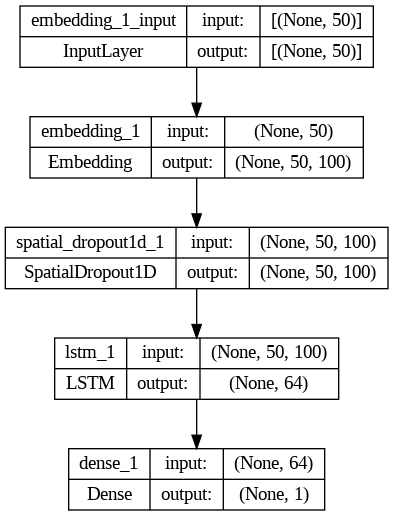

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, to_file='multichannel.png')

In [ ]:
le = LabelEncoder()
y = le.fit_transform(olid['subtask_a'])

X_train, X_valid, y_train, y_valid = train_test_split(tweet_pad, y, test_size=0.33, random_state=42)



# X_train,X_test,y_train,y_test=train_test_split(train,tweet['target'].values,test_size=0.15)
print('Shape of train',X_train.shape)
print("Shape of Validation ",X_valid.shape)
callback = EarlyStopping(monitor='val_loss', patience=10, min_delta = 0.005 )

history=model.fit(X_train,y_train,
                  batch_size=512,
                  epochs=100,
                  validation_data=(X_valid,y_valid),
                  shuffle = True,
                  verbose=2,
                 callbacks = [callback])

preds_valid = np.round(model.predict(X_valid))
proba_valid = model.predict(X_valid)
preds_train = np.round(model.predict(X_train))
proba_train = model.predict(X_train)

print(classification_report(y_train, preds_train))
print('AUC: ', roc_auc_score(y_train, proba_train))

print(classification_report(y_valid, preds_valid))
print('AUC: ',  roc_auc_score(y_valid, proba_valid))

Shape of train (8870, 50)
Shape of Validation  (4370, 50)
Epoch 1/100
18/18 - 22s - loss: 0.6892 - accuracy: 0.6533 - val_loss: 0.6855 - val_accuracy: 0.6643 - 22s/epoch - 1s/step
Epoch 2/100
18/18 - 11s - loss: 0.6828 - accuracy: 0.6669 - val_loss: 0.6788 - val_accuracy: 0.6643 - 11s/epoch - 636ms/step
Epoch 3/100
18/18 - 11s - loss: 0.6751 - accuracy: 0.6685 - val_loss: 0.6700 - val_accuracy: 0.6643 - 11s/epoch - 619ms/step
Epoch 4/100
18/18 - 13s - loss: 0.6639 - accuracy: 0.6681 - val_loss: 0.6572 - val_accuracy: 0.6643 - 13s/epoch - 708ms/step
Epoch 5/100
18/18 - 13s - loss: 0.6484 - accuracy: 0.6687 - val_loss: 0.6427 - val_accuracy: 0.6643 - 13s/epoch - 738ms/step
Epoch 6/100
18/18 - 13s - loss: 0.6362 - accuracy: 0.6692 - val_loss: 0.6375 - val_accuracy: 0.6634 - 13s/epoch - 702ms/step
Epoch 7/100
18/18 - 13s - loss: 0.6306 - accuracy: 0.6678 - val_loss: 0.6321 - val_accuracy: 0.6677 - 13s/epoch - 704ms/step
Epoch 8/100
18/18 - 12s - loss: 0.6274 - accuracy: 0.6675 - val_loss: 

In [ ]:
olid = pd.read_csv('/content/drive/MyDrive/CSE_712_Project/data.csv')
olid = olid[~pd.isna(olid['tweet_cleaned'])]
olid_test = pd.read_csv('/content/drive/MyDrive/CSE_712_Project/dataset/olid-levela.csv')
olid_test = olid_test[~pd.isna(olid_test['tweet_cleaned'])]

In [ ]:
olid_test

,id,tweet,subtask_a,tweet_cleaned
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF,democrats support antifa muslim brotherhood ms...
1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT,is revered by conservatives hated by progressi...
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT,first it reduces the ca url
3,13876,#Watching #Boomer getting the news that she is...,NOT,getting the news that she is still up for paro...
4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF,unity demo to oppose the farright in – — en...
...,...,...,...,...
855,73439,#DespicableDems lie again about rifles. Dem Di...,OFF,lie again about rifles dem distorted the law t...
856,25657,#MeetTheSpeakers 🙌 @USER will present in our e...,NOT,will present in our event oiw 2018 finpact gl...
857,67018,3 people just unfollowed me for talking about ...,OFF,3 people just unfollowed me for talking about ...
858,50665,#WednesdayWisdom Antifa calls the right fascis...,NOT,antifa calls the right fascist when in all rea...


In [ ]:
olid

,id,tweet,subtask_a,subtask_b,subtask_c,tweet_cleaned
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN,she should ask a few native americans what the...
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND,go home you’re drunk url
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN,amazon is investigating chinese employees who ...
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN,someone shouldvetaken this piece of shit to a ...
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN,obama wanted liberals illegals to move into r...
...,...,...,...,...,...,...
13235,95338,@USER Sometimes I get strong vibes from people...,OFF,TIN,IND,sometimes i get strong vibes from people and t...
13236,67210,Benidorm ✅ Creamfields ✅ Maga ✅ Not too sh...,NOT,NaN,NaN,benidorm creamfields maga not too shabb...
13237,82921,@USER And why report this garbage. We don't g...,OFF,TIN,OTH,and why report this garbage we dont give a crap
13238,27429,@USER Pussy,OFF,UNT,NaN,pussy


In [ ]:
#Test
le = LabelEncoder()
y = le.fit_transform(olid['subtask_a'])
print(y.shape)

y_test = le.transform(olid_test['subtask_a'])
corpus_test = create_corpus(olid_test['tweet_cleaned'])
sequences_test = tokenizer_obj.texts_to_sequences(corpus_test) #??

X_test = pad_sequences(sequences_test,maxlen=MAX_LEN,truncating='post',padding='post')

callback = EarlyStopping(monitor='val_loss', patience=10, min_delta = 0.005 )
history=model.fit(X_valid,y_valid,
                  batch_size=512,
                  epochs=100,
                  validation_data=(X_test,y_test),
                  shuffle = True,
                  verbose=2,
                 callbacks = [callback])



print(X_test.shape, y_test.shape)
preds_test = model.predict(X_test)
print(classification_report(y_test, np.round(preds_test)))

print('AUC: ',  roc_auc_score(y_test, preds_test))

(13239,)


100%|██████████| 860/860 [00:00<00:00, 4874.11it/s]


Epoch 1/100
9/9 - 6s - loss: 0.4904 - accuracy: 0.7659 - val_loss: 0.4266 - val_accuracy: 0.8093 - 6s/epoch - 654ms/step
Epoch 2/100
9/9 - 7s - loss: 0.4846 - accuracy: 0.7723 - val_loss: 0.4286 - val_accuracy: 0.8081 - 7s/epoch - 805ms/step
Epoch 3/100
9/9 - 5s - loss: 0.4846 - accuracy: 0.7691 - val_loss: 0.4273 - val_accuracy: 0.8105 - 5s/epoch - 586ms/step
Epoch 4/100
9/9 - 5s - loss: 0.4783 - accuracy: 0.7815 - val_loss: 0.4280 - val_accuracy: 0.8128 - 5s/epoch - 530ms/step
Epoch 5/100
9/9 - 7s - loss: 0.4771 - accuracy: 0.7789 - val_loss: 0.4292 - val_accuracy: 0.8093 - 7s/epoch - 767ms/step
Epoch 6/100
9/9 - 5s - loss: 0.4678 - accuracy: 0.7863 - val_loss: 0.4281 - val_accuracy: 0.8151 - 5s/epoch - 547ms/step
Epoch 7/100
9/9 - 6s - loss: 0.4714 - accuracy: 0.7799 - val_loss: 0.4284 - val_accuracy: 0.8128 - 6s/epoch - 645ms/step
Epoch 8/100
9/9 - 6s - loss: 0.4705 - accuracy: 0.7833 - val_loss: 0.4261 - val_accuracy: 0.8163 - 6s/epoch - 654ms/step
Epoch 9/100
9/9 - 5s - loss: 0.4

## CNN Text v1

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

from tqdm import tqdm
from keras.models import Sequential, Model
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Input, Conv1D, GlobalMaxPooling1D, Concatenate, Dropout, Add
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

def create_corpus(tweets):
    stop=set(stopwords.words('english'))
    corpus=[]
    for tweet in tqdm(tweets):
#         words=[word.lower() for word in nltk.casual_tokenize(tweet) if((word.isalpha()==1) & (word not in stop))]
        words=[word.lower() for word in nltk.casual_tokenize(tweet)]
        corpus.append(words)
    return corpus

corpus=create_corpus(cleaned_data['tweet_cleaned'])

embedding_dict={}
# with open('./data/glove6B/glove.6B.100d.txt','r') as f:
with open('/content/drive/MyDrive/CSE_712_Project/dataset/glove.twitter.27B.100d.txt','r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

MAX_LEN=50
filter_sizes = (3, 8)
num_filters = 20
embedding_dim = 100


tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(corpus) #??
sequences = tokenizer_obj.texts_to_sequences(corpus) #??

tweet_pad = pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

word_index = tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

num_words = len(word_index)+1
embedding_matrix = np.zeros((num_words,embedding_dim))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue

    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec


graph_in = Input(shape=(MAX_LEN, embedding_dim))
convs = []
for fsz in filter_sizes:
    conv = Conv1D(filters=num_filters,
                         kernel_size=fsz,
                         padding='valid',
                         activation='tanh',
                         use_bias = True)(graph_in)
                         #,subsample_length=1)(graph_in)
    print(conv)
    pool = GlobalMaxPooling1D()(conv)
    print(pool)
    #flatten = Flatten()(pool)
    convs.append(pool)

if len(filter_sizes)>1:
    out = Concatenate()(convs)
else:
    out = convs[0]

graph = Model(inputs=graph_in, outputs=out)


model=Sequential()

embedding=Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=True)

model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(graph)
# model.add(SpatialDropout1D(0.2))
model.add(Dropout(0.5))
# model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


optimzer=Adam(learning_rate=1e-4)

model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

model.summary()

100%|██████████| 13240/13240 [00:01<00:00, 8459.06it/s]


Number of unique words: 19064


100%|██████████| 19064/19064 [00:00<00:00, 434767.21it/s]

KerasTensor(type_spec=TensorSpec(shape=(None, 48, 20), dtype=tf.float32, name=None), name='conv1d/Tanh:0', description="created by layer 'conv1d'")
KerasTensor(type_spec=TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), name='global_max_pooling1d/Max:0', description="created by layer 'global_max_pooling1d'")
KerasTensor(type_spec=TensorSpec(shape=(None, 43, 20), dtype=tf.float32, name=None), name='conv1d_1/Tanh:0', description="created by layer 'conv1d_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), name='global_max_pooling1d_1/Max:0', description="created by layer 'global_max_pooling1d_1'")
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 100)           1906500   
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 50, 100)          0         
 l

                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1,928,581
Trainable params: 1,928,581
Non-trainable params: 0
_________________________________________________________________


## Train and validate

In [ ]:
# train=tweet_pad[:tweet.shape[0]]
# test=tweet_pad[tweet.shape[0]:]
le = LabelEncoder()
y = le.fit_transform(cleaned_data['subtask_a'])

X_train, X_valid, y_train, y_valid = train_test_split(tweet_pad, y, test_size=0.33, random_state=42)



# X_train,X_test,y_train,y_test=train_test_split(train,tweet['target'].values,test_size=0.15)
print('Shape of train',X_train.shape)
print("Shape of Validation ",X_valid.shape)

callback = EarlyStopping(monitor='val_loss', patience=10, min_delta = 0.005 )
history=model.fit(X_train,y_train,
                  batch_size=512,
                  epochs=100,
                  validation_data=(X_valid,y_valid),
                  shuffle = True,
                  verbose=2,
                 callbacks = [callback])

preds_valid = np.round(model.predict(X_valid))
proba_valid = model.predict(X_valid)
preds_train = np.round(model.predict(X_train))
proba_train = model.predict(X_train)

print(classification_report(y_train, preds_train))
print('AUC: ', roc_auc_score(y_train, proba_train))

print(classification_report(y_valid, preds_valid))
print('AUC: ',  roc_auc_score(y_valid, proba_valid))

Shape of train (8870, 50)
Shape of Validation  (4370, 50)
Epoch 1/100
18/18 - 6s - loss: 0.7920 - accuracy: 0.5317 - val_loss: 0.6437 - val_accuracy: 0.6593 - 6s/epoch - 334ms/step
Epoch 2/100
18/18 - 5s - loss: 0.7693 - accuracy: 0.5623 - val_loss: 0.6341 - val_accuracy: 0.6643 - 5s/epoch - 265ms/step
Epoch 3/100
18/18 - 4s - loss: 0.7487 - accuracy: 0.5868 - val_loss: 0.6317 - val_accuracy: 0.6654 - 4s/epoch - 207ms/step
Epoch 4/100
18/18 - 4s - loss: 0.7400 - accuracy: 0.5941 - val_loss: 0.6292 - val_accuracy: 0.6661 - 4s/epoch - 228ms/step
Epoch 5/100
18/18 - 6s - loss: 0.7349 - accuracy: 0.5986 - val_loss: 0.6250 - val_accuracy: 0.6666 - 6s/epoch - 310ms/step
Epoch 6/100
18/18 - 4s - loss: 0.7245 - accuracy: 0.6116 - val_loss: 0.6198 - val_accuracy: 0.6673 - 4s/epoch - 211ms/step
Epoch 7/100
18/18 - 4s - loss: 0.7211 - accuracy: 0.6166 - val_loss: 0.6155 - val_accuracy: 0.6680 - 4s/epoch - 206ms/step
Epoch 8/100
18/18 - 6s - loss: 0.7141 - accuracy: 0.6112 - val_loss: 0.6110 - val

In [ ]:
#Subtask B
le = LabelEncoder()
y = le.fit_transform(cleaned_data['subtask_b'])

X_train, X_valid, y_train, y_valid = train_test_split(tweet_pad, y, test_size=0.33, random_state=42)



# X_train,X_test,y_train,y_test=train_test_split(train,tweet['target'].values,test_size=0.15)
print('Shape of train',X_train.shape)
print("Shape of Validation ",X_valid.shape)

callback = EarlyStopping(monitor='val_loss', patience=10, min_delta = 0.005 )
history=model.fit(X_train,y_train,
                  batch_size=512,
                  epochs=100,
                  validation_data=(X_valid,y_valid),
                  shuffle = True,
                  verbose=2,
                 callbacks = [callback])

preds_valid = np.round(model.predict(X_valid))
proba_valid = model.predict(X_valid)
preds_train = np.round(model.predict(X_train))
proba_train = model.predict(X_train)

print(classification_report(y_train, preds_train))
# print('AUC: ', roc_auc_score(y_train, proba_train,multi_class='ovr'))

print(classification_report(y_valid, preds_valid))
# print('AUC: ',  roc_auc_score(y_valid, proba_valid,multi_class='ovr'))

Shape of train (8870, 50)
Shape of Validation  (4370, 50)
Epoch 1/100
18/18 - 9s - loss: -3.2493e+00 - accuracy: 0.0369 - val_loss: -3.4053e+00 - val_accuracy: 0.0451 - 9s/epoch - 509ms/step
Epoch 2/100
18/18 - 8s - loss: -3.3888e+00 - accuracy: 0.0370 - val_loss: -3.5266e+00 - val_accuracy: 0.0451 - 8s/epoch - 421ms/step
Epoch 3/100
18/18 - 5s - loss: -3.5391e+00 - accuracy: 0.0369 - val_loss: -3.6383e+00 - val_accuracy: 0.0451 - 5s/epoch - 264ms/step
Epoch 4/100
18/18 - 4s - loss: -3.6461e+00 - accuracy: 0.0369 - val_loss: -3.7429e+00 - val_accuracy: 0.0451 - 4s/epoch - 231ms/step
Epoch 5/100
18/18 - 5s - loss: -3.7678e+00 - accuracy: 0.0369 - val_loss: -3.8406e+00 - val_accuracy: 0.0451 - 5s/epoch - 254ms/step
Epoch 6/100
18/18 - 5s - loss: -3.8594e+00 - accuracy: 0.0369 - val_loss: -3.9321e+00 - val_accuracy: 0.0451 - 5s/epoch - 286ms/step
Epoch 7/100
18/18 - 4s - loss: -3.9264e+00 - accuracy: 0.0369 - val_loss: -4.0185e+00 - val_accuracy: 0.0451 - 4s/epoch - 210ms/step
Epoch 8/100

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

## Test

In [ ]:
le = LabelEncoder()
y = le.fit_transform(cleaned_data['subtask_a'])

y_test = le.transform(olid_test['subtask_a'])
corpus_test = create_corpus(olid_test['tweet_cleaned'])
sequences_test = tokenizer_obj.texts_to_sequences(corpus_test) #??

X_test = pad_sequences(sequences_test,maxlen=MAX_LEN,truncating='post',padding='post')

callback = EarlyStopping(monitor='val_loss', patience=10, min_delta = 0.005 )

history=model.fit(tweet_pad,y,
                  batch_size=512,
                  epochs=100,
                  validation_data=(X_test,y_test),
                  shuffle = True,
                  verbose=2,
                 callbacks = [callback])



print(X_test.shape, y_test.shape)
preds_test = model.predict(X_test)
print(classification_report(y_test, np.round(preds_test)))

print('AUC: ',  roc_auc_score(y_test, preds_test))

100%|██████████| 860/860 [00:00<00:00, 7006.22it/s]


Epoch 1/100
26/26 - 5s - loss: 12.6478 - accuracy: 0.2923 - val_loss: 13.4682 - val_accuracy: 0.2395 - 5s/epoch - 204ms/step
Epoch 2/100
26/26 - 7s - loss: 11.1753 - accuracy: 0.2753 - val_loss: 10.7994 - val_accuracy: 0.2233 - 7s/epoch - 282ms/step
Epoch 3/100
26/26 - 5s - loss: 8.4359 - accuracy: 0.2564 - val_loss: 7.9479 - val_accuracy: 0.2198 - 5s/epoch - 200ms/step
Epoch 4/100
26/26 - 7s - loss: 6.5901 - accuracy: 0.2538 - val_loss: 6.5254 - val_accuracy: 0.2070 - 7s/epoch - 279ms/step
Epoch 5/100
26/26 - 6s - loss: 5.3788 - accuracy: 0.2597 - val_loss: 5.3785 - val_accuracy: 0.1942 - 6s/epoch - 221ms/step
Epoch 6/100
26/26 - 9s - loss: 4.3660 - accuracy: 0.2802 - val_loss: 4.1550 - val_accuracy: 0.2128 - 9s/epoch - 349ms/step
Epoch 7/100
26/26 - 5s - loss: 3.4359 - accuracy: 0.3133 - val_loss: 2.9671 - val_accuracy: 0.2314 - 5s/epoch - 200ms/step
Epoch 8/100
26/26 - 6s - loss: 2.7289 - accuracy: 0.3570 - val_loss: 2.1210 - val_accuracy: 0.3105 - 6s/epoch - 228ms/step
Epoch 9/100


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


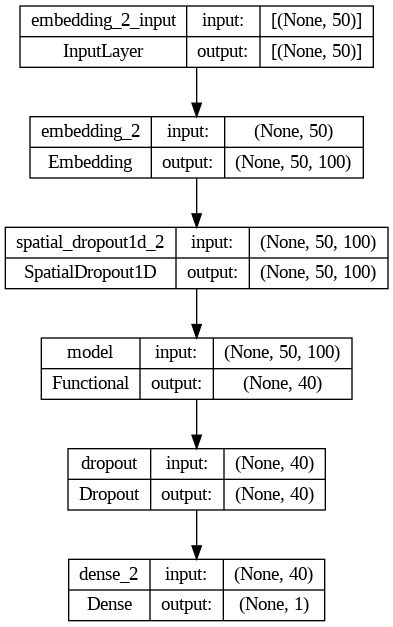

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, to_file='multichannel.png')

## NBSVM

In [ ]:
class NbSvmClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, C=1.0, dual=False, n_jobs=1):
        self.C = C
        self.dual = dual
        self.n_jobs = n_jobs

    def predict(self, x):
        # Verify that model has been fit
        check_is_fitted(self, ['_r', '_clf'])
        return self._clf.predict(x.multiply(self._r))

    def predict_proba(self, x):
        # Verify that model has been fit
        check_is_fitted(self, ['_r', '_clf'])
        return self._clf.predict_proba(x.multiply(self._r))

    def pr(self, x, y_i, y):
        p = x[y==y_i].sum(0)
        return (p+1) / ((y==y_i).sum()+1)

    def fit(self, x, y):
        # Check that X and y have correct shape
#         y = y
        x, y = check_X_y(x, y, accept_sparse=True)
        self._r = sparse.csr_matrix(np.log(self.pr(x,1,y) / self.pr(x,0,y)))
        x_nb = x.multiply(self._r)
        self._clf = LogisticRegression(C=self.C, dual=self.dual, n_jobs=self.n_jobs, solver ='liblinear').fit(x_nb, y)
        self.coef_ = self._clf.coef_
        return self

## Train and Validate

In [ ]:
def train_validate(X, y, min_df, threshold_plot=False):
    le = LabelEncoder()
    y = le.fit_transform(y)

    tfv = TfidfVectorizer(tokenizer=nltk.casual_tokenize, min_df=min_df,  max_features=30000,
                strip_accents='unicode', analyzer='word',ngram_range=(1,3),
                use_idf=1,smooth_idf=1,sublinear_tf=1,
                stop_words = 'english')
    X = tfv.fit_transform(X).tocsr()

    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)
    print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)


    model = NbSvmClassifier(C=1, dual=True, n_jobs=1)

    model.fit(X_train, y_train)
    preds_valid = model.predict(X_valid)
#     proba_valid = model.predict_proba(X_valid)[:,1]
    preds_train = model.predict(X_train)
#     proba_train = model.predict_proba(X_train)[:,1]

    print('##### TRAINING DATA #####')

    print(classification_report(y_train, preds_train))
    try:
        print('AUC: ',  roc_auc_score(y_train, model.predict_proba(X_train)[:,1]))
    except:
        print('AUC: ',  roc_auc_score(y_train, model.predict_proba(X_train), multi_class ='ovr'))

    print('##### VALIDATION DATA #####')
    print(classification_report(y_valid, preds_valid))
    try:
        print('AUC: ',  roc_auc_score(y_valid, model.predict_proba(X_valid)[:,1]))
    except:
        print('AUC: ',  roc_auc_score(y_valid, model.predict_proba(X_valid), multi_class ='ovr'))

    if threshold_plot:
        thresholds  = []
        scores = []
        for th in range(1,10):
            thresholds.append(th/10)

            scores.append(f1_score(y_valid, model.predict_proba(X_valid)[:,1] > (th/10), average = 'macro'))

        plt.plot(thresholds, scores)
    return model, tfv

## Test

In [ ]:
def test(X, y, X_test,y_test,min_df, threshold = 0.5):
    le = LabelEncoder()
    y = le.fit_transform(y)

    tfv = TfidfVectorizer(tokenizer=nltk.casual_tokenize, min_df=min_df,  max_features=30000,
                strip_accents='unicode', analyzer='word',ngram_range=(1,1),
                use_idf=1,smooth_idf=1,sublinear_tf=1,
                stop_words = 'english')
    X = tfv.fit_transform(X).tocsr()

    model = NbSvmClassifier(C=1, dual=True, n_jobs=1)

    model.fit(X, y)

    y_test = le.transform(y_test)
    X_test = tfv.transform(X_test).tocsr()

    print('##### TEST DATA #####')
    print(X_test.shape, y_test.shape)
#     proba_test = model.predict_proba(X_test)[:,1]

    if len(le.classes_) > 2:
        preds_test = model.predict(X_test)
        print(classification_report(y_test, preds_test))
        print('AUC: ',  roc_auc_score(y_test, model.predict_proba(X_test), multi_class ='ovr'))
    else:

        print(classification_report(y_test, (model.predict_proba(X_test)[:,1] > threshold).astype('int')))
        print('AUC: ',  roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))


    return model, tfv

In [ ]:
def two_pred(preds):
    if preds[0] == 1:
        return 1
    else:
        if preds[1] == 0:
            return 0
        else:
            return 2

def two_stage(X_test, y_test, model1, model2, tfv1, tfv2, th1, th2):

    X_test1 = tfv1.transform(X_test).tocsr()
    X_test2 = tfv2.transform(X_test).tocsr()

    # 0 grp 1 inv 2 oth

    y_pred1 = (model1.predict_proba(X_test1)[:,1] > th1).astype('int') # 0 inv 1 not inv
    y_pred1 = np.array([1] *len(y_pred1)) ^ y_pred1 # 0 not inv 1 inv

    y_pred2 = (model2.predict_proba(X_test2)[:,1] > th2).astype('int') # 0 grp 1 oth


    preds = list(tuple(zip(y_pred1,y_pred2)))
    preds_test = np.array(list(map( two_pred, preds)))

    le = LabelEncoder()
    y = le.fit_transform(y_test)

    print(classification_report(y, preds_test))

In [ ]:
A = np.array([1,1,0,0])
B = np.array([0,1,0,1])
def two_pred(preds):
    if preds[0] == 1:
        return 1
    else:
        if preds[1] == 0:
            return 0
        else:
            return 2
preds = list(tuple(zip(A,B)))
list(map( two_pred, preds))

[1, 1, 0, 2]

## Subtask A

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(8870, 1183) (4369, 1183) (8870,) (4369,)
##### TRAINING DATA #####
              precision    recall  f1-score   support

           0       0.77      0.96      0.85      5922
           1       0.83      0.43      0.57      2948

    accuracy                           0.78      8870
   macro avg       0.80      0.69      0.71      8870
weighted avg       0.79      0.78      0.76      8870

AUC:  0.8357846658299183
##### VALIDATION DATA #####
              precision    recall  f1-score   support

           0       0.76      0.95      0.84      2917
           1       0.78      0.39      0.52      1452

    accuracy                           0.76      4369
   macro avg       0.77      0.67      0.68      4369
weighted avg       0.77      0.76      0.74      4369

AUC:  0.7680661761442139


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


##### TEST DATA #####
(860, 1085) (860,)
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       620
           1       0.76      0.50      0.60       240

    accuracy                           0.82       860
   macro avg       0.79      0.72      0.74       860
weighted avg       0.81      0.82      0.80       860

AUC:  0.7768783602150537


(NbSvmClassifier(C=1, dual=True),
 TfidfVectorizer(max_features=30000, min_df=20, smooth_idf=1,
                 stop_words='english', strip_accents='unicode', sublinear_tf=1,
                 tokenizer=<function casual_tokenize at 0x7abf33e6ed40>,
                 use_idf=1))

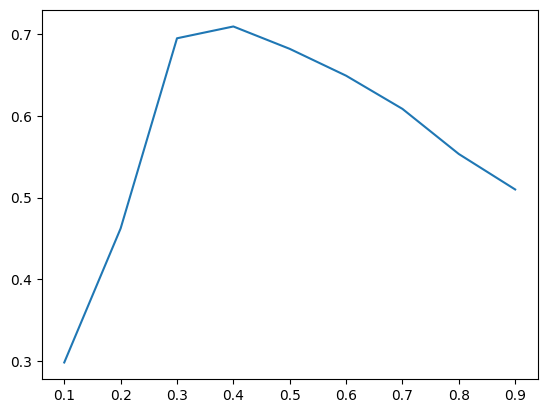

In [ ]:
modela, tfva = train_validate(olid_traina['tweet_cleaned'], olid_traina['subtask_a'], 20, True)
test(olid_traina['tweet_cleaned'], olid_traina['subtask_a'], olid_testa['tweet_cleaned'], olid_testa['subtask_a'], 20, 0.4)

## Subtask B

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(2948, 1353) (1452, 1353) (2948,) (1452,)
##### TRAINING DATA #####
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2599
           1       0.84      0.05      0.09       349

    accuracy                           0.89      2948
   macro avg       0.86      0.52      0.51      2948
weighted avg       0.88      0.89      0.84      2948

AUC:  0.8648901770683237
##### VALIDATION DATA #####
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      1277
           1       0.33      0.01      0.02       175

    accuracy                           0.88      1452
   macro avg       0.61      0.50      0.48      1452
weighted avg       0.81      0.88      0.82      1452

AUC:  0.6458888018794049


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


##### TEST DATA #####
(240, 1215) (240,)
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       213
           1       0.48      0.48      0.48        27

    accuracy                           0.88       240
   macro avg       0.71      0.71      0.71       240
weighted avg       0.88      0.88      0.88       240

AUC:  0.7701269344461832


(NbSvmClassifier(C=1, dual=True),
 TfidfVectorizer(max_features=30000, min_df=7, smooth_idf=1,
                 stop_words='english', strip_accents='unicode', sublinear_tf=1,
                 tokenizer=<function casual_tokenize at 0x7abf33e6ed40>,
                 use_idf=1))

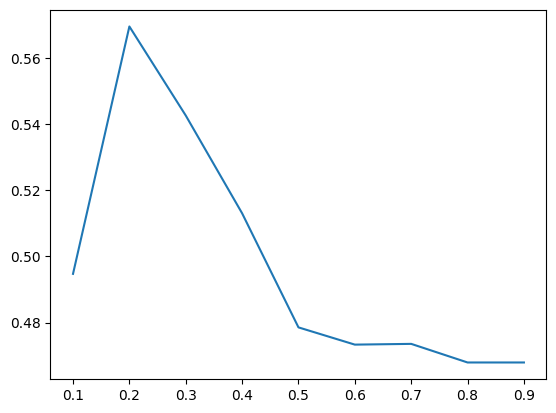

In [ ]:
modelb, tfvb = train_validate(olid_trainb['tweet_cleaned'], olid_trainb['subtask_b'],7, True)
test(olid_trainb['tweet_cleaned'], olid_trainb['subtask_b'], olid_testb['tweet_cleaned'], olid_testb['subtask_b'],7, 0.2)